<a href="https://colab.research.google.com/github/eleanarey/ProgramingPractices/blob/main/ReyQuijadaEleanaLiscarCAT4_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Description

This assignment teaches the student how the CUDA paradigm works by practicing.

It leverages the Google Colab platform, which provides GPU-enabled environments.
Google Colab is a cloud service running Jupyter notebook environments1. Colab provides natively the interface to other Google services and programming libraries. Although there
exists a payment version with more capacity (Colab Pro), the free version will be enough for this assignment.
If you are not familiar with the Jupyter-like notebook environment, here you have an excellent tutorial on Google Colab: https://youtu.be/inN8seMm7UI.

# 1 CUDA Execution Environment

Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser. Furthermore, there are extensions to run other languages. Particularly, in this assignment, we will use an extension for running CUDA C/C++ code.

We can access Google Colab via https://colab.research.google.com (see Figure 1).

To begin with, we will create a new notebook File > New notebook (see Figure 3).
By default, the environment is not equipped with a GPU. Google Colab allows the use of accelerators in our notebooks. For this assignment, we will enable a GPU:

Edit > Notebook settings > T4 GPU > Save (see Figure 4).

Notice that changing this setting resets the environment, and cells must be executed again.

In the moment of writing this document, Cuda toolkit is already installed in the Colab
environment (in previous semesters it was not the case, so we needed to install it manually).
We can check the compiler version running the following command within a cell:

In [ ]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


Then, the NVCC plugin can be loaded:

In [ ]:
!pip install nvcc4jupyter
%load_ext nvcc4jupyter

Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmp5894phf1".


The first line of the cell executes the Linux command that set up the software requirements
in the underlying operating system of the host machine that runs the Jupyter environment.
The second line loads the CUDA environment in the Jupyter notebook.
Once it is finished, we will be able to run the CUDA C/C++ code using the extension
%%cuda at the beginning of each cell.
For instance, this code implements the typical “hello world”:

In [ ]:
%%cuda
#include <stdio.h>
__global__ void hello_kernel ( void ) {
printf ( "Hello world from the device! \n" ) ;
}
int main ( void ) {
printf ( "Hello world from the host! \n" ) ;
hello_kernel<<<1,1>>>() ;
cudaDeviceSynchronize ( ) ;
return 0;
}

Hello world from the host! 
Hello world from the device! 



# 2 Threading
Figure 5 exemplifies an example of how blocks and threads are organized. If we know the problem size and the block size, we could calculate the number of blocks.
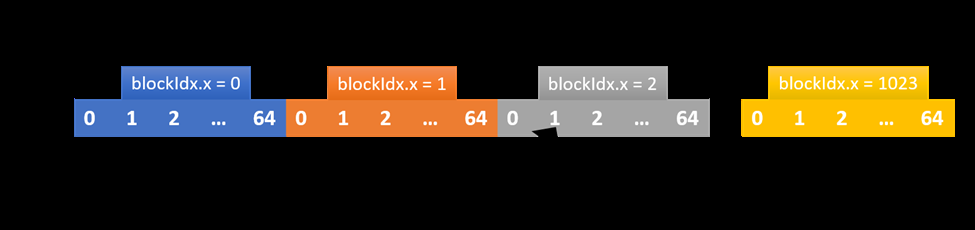

# Question 1. Provide the code that generates an output similar to this:
Username: capb44
Blocks: 5
Threads per block: 5
My Id is 10, I am the thread 0 out of 5 in block 2
My Id is 11, I am the thread 1 out of 5 in block 2
My Id is 12, I am the thread 2 out of 5 in block 2
My Id is 13, I am the thread 3 out of 5 in block 2
My Id is 14, I am the thread 4 out of 5 in block 2
My Id is 0, I am the thread 0 out of 5 in block 0
My Id is 1, I am the thread 1 out of 5 in block 0
My Id is 2, I am the thread 2 out of 5 in block 0
My Id is 3, I am the thread 3 out of 5 in block 0
My Id is 4, I am the thread 4 out of 5 in block 0
My Id is 5, I am the thread 0 out of 5 in block 1
My Id is 6, I am the thread 1 out of 5 in block 1
My Id is 7, I am the thread 2 out of 5 in block 1
My Id is 8, I am the thread 3 out of 5 in block 1
My Id is 9, I am the thread 4 out of 5 in block 1
My Id is 20, I am the thread 0 out of 5 in block 4
My Id is 21, I am the thread 1 out of 5 in block 4
My Id is 22, I am the thread 2 out of 5 in block 4
My Id is 23, I am the thread 3 out of 5 in block 4
My Id is 24, I am the thread 4 out of 5 in block 4
My Id is 15, I am the thread 0 out of 5 in block 3
My Id is 16, I am the thread 1 out of 5 in block 3
My Id is 17, I am the thread 2 out of 5 in block 3
My Id is 18, I am the thread 3 out of 5 in block 3
My Id is 19, I am the thread 4 out of 5 in block 3
Use as number of blocks the first digit plus one of the numerical
part of your eimtarqso username and as threads per block the
second digit plus one.

In [ ]:
%%cuda
#include <stdio.h>

// CUDA kernel to print thread and block information
__global__ void print_thread_info() {
    int block_id = blockIdx.x;         // Block index
    int thread_id = threadIdx.x;       // Thread index within a block
    int threads_per_block = blockDim.x; // Total threads per block
    int global_thread_id = block_id * threads_per_block + thread_id; // Global thread ID

    // Print thread and block details
    printf("My Id is %d, I am the thread %d out of %d in block %d\n",
           global_thread_id, thread_id, threads_per_block, block_id);
}

int main() {
    int blocks = 6;          // Number of blocks (5 + 1 from the username)
    int threads_per_block = 4; // Threads per block (3 + 1 from the username)

    printf("Username: capb53\n");
    printf("Blocks: %d\n", blocks);
    printf("Threads per block: %d\n", threads_per_block);

    // Launch the kernel with the specified configuration
    print_thread_info<<<blocks, threads_per_block>>>();

    // Synchronize to ensure all threads complete before exiting
    cudaDeviceSynchronize();

    return 0;
}


Username: capb53
Blocks: 6
Threads per block: 4
My Id is 16, I am the thread 0 out of 4 in block 4
My Id is 17, I am the thread 1 out of 4 in block 4
My Id is 18, I am the thread 2 out of 4 in block 4
My Id is 19, I am the thread 3 out of 4 in block 4
My Id is 4, I am the thread 0 out of 4 in block 1
My Id is 5, I am the thread 1 out of 4 in block 1
My Id is 6, I am the thread 2 out of 4 in block 1
My Id is 7, I am the thread 3 out of 4 in block 1
My Id is 12, I am the thread 0 out of 4 in block 3
My Id is 13, I am the thread 1 out of 4 in block 3
My Id is 14, I am the thread 2 out of 4 in block 3
My Id is 15, I am the thread 3 out of 4 in block 3
My Id is 20, I am the thread 0 out of 4 in block 5
My Id is 21, I am the thread 1 out of 4 in block 5
My Id is 22, I am the thread 2 out of 4 in block 5
My Id is 23, I am the thread 3 out of 4 in block 5
My Id is 0, I am the thread 0 out of 4 in block 0
My Id is 1, I am the thread 1 out of 4 in block 0
My Id is 2, I am the thread 2 out of 4 i

CUDA excels at parallel computation where many threads can perform independent tasks simultaneously. That’s why we have to understand that we have to fully utilize the parallel processing power of the GPUs with a proper thread assignment. This code, however, lacks that desired massive parallelism:

In [ ]:
%%cuda

__global__ void multipicationKernel(const int size,
                                    const double* src_matrix_1,
                                    const double* src_matrix_2,
                                    double* dst_matrix) {
    for (int i = 0; i < size; i++) {
        for (int j = 0; j < size; j++) {
            double sum = 0;
            for (int k = 0; k < size; k++) {
                sum += src_matrix_1[i * size + k] * src_matrix_2[k * size + j];
            }
            dst_matrix[i * size + j] = sum;
        }
    }
}




/usr/bin/ld: /usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu/Scrt1.o: in function `_start':
(.text+0x1b): undefined reference to `main'
collect2: error: ld returned 1 exit status



# Question 2. Regarding the code (available in loops.cu):
## What’s wrong with that code?

El código CUDA en el archivo "loops.cu" tiene problemas fundamentales relacionados con el paralelismo y la eficiencia en la GPU:

Ejecución Secuencial dentro de los Hilos:

Cada hilo ejecuta bucles anidados para procesar todas las filas y columnas de las matrices. Esto contradice el propósito de las GPU, que están diseñadas para dividir el trabajo en muchas tareas pequeñas y paralelas. Esto hace que la ejecución sea similar a un programa secuencial, desperdiciando la capacidad de paralelismo masivo.
Distribución Inadecuada del Trabajo:

No se divide el trabajo entre múltiples hilos y bloques. El paradigma de CUDA aprovecha que cada hilo calcule una pequeña porción del problema total, como un elemento de la matriz resultante.
Patrones de Acceso a Memoria:

Es probable que el código acceda a la memoria global de manera no coalescente, lo que provoca un uso ineficiente de la memoria y afecta negativamente el rendimiento.

## Provide a CUDA kernel that leverages GPU parallelism.


In [ ]:
%%cuda
#include <stdio.h>

// CUDA Kernel for Matrix Multiplication
__global__ void matrixMultiplyKernel(const double* A, const double* B, double* C, int N) {
    int row = blockIdx.y * blockDim.y + threadIdx.y;  // Row index
    int col = blockIdx.x * blockDim.x + threadIdx.x;  // Column index

    if (row < N && col < N) {
        double sum = 0;
        for (int k = 0; k < N; k++) {
            sum += A[row * N + k] * B[k * N + col];
        }
        C[row * N + col] = sum;
    }
}

int main() {
    int N = 1024;  // Matrix size (NxN)

    size_t size = N * N * sizeof(double);

    // Allocate host memory
    double* h_A = (double*)malloc(size);
    double* h_B = (double*)malloc(size);
    double* h_C = (double*)malloc(size);

    // Initialize host matrices
    for (int i = 0; i < N * N; i++) {
        h_A[i] = 1.0;
        h_B[i] = 2.0;
    }

    // Allocate device memory
    double *d_A, *d_B, *d_C;
    cudaMalloc(&d_A, size);
    cudaMalloc(&d_B, size);
    cudaMalloc(&d_C, size);

    // Copy data to device
    cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, h_B, size, cudaMemcpyHostToDevice);

    // Define block and grid sizes 16x16 threads per block
    dim3 blockDim(16, 16);
    dim3 gridDim((N + blockDim.x - 1) / blockDim.x, (N + blockDim.y - 1) / blockDim.y);

    // Launch kernel
    matrixMultiplyKernel<<<gridDim, blockDim>>>(d_A, d_B, d_C, N);

    // Copy result back to host
    cudaMemcpy(h_C, d_C, size, cudaMemcpyDeviceToHost);

    // Print a few results
    printf("C[0][0] = %f\n", h_C[0]);
    printf("C[N-1][N-1] = %f\n", h_C[N * N - 1]);

    // Free memory
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);
    free(h_A);
    free(h_B);
    free(h_C);

    return 0;
}


C[0][0] = 2048.000000
C[N-1][N-1] = 2048.000000



# 3 Programming Exercises
# 3.1 Stencil
Following the stencil computation learned in CAT3, we can run that operation on a GPU by applying a kernel to each cell of an array.
For instance, the following kernel can be applied to an RGB image to convert it to grayscale based on some arbitrary weights:

In [ ]:
%%cuda
__global__ void grayscaleKernel(unsigned char* d_input,
                                 unsigned char* d_output,
                                 int width, int height) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;
    int idx = (y * width + x) * 3;

    if (x < width && y < height) {
        unsigned char gray = 0.3f * d_input[idx]
                           + 0.59f * d_input[idx + 1]
                           + 0.11f * d_input[idx + 2];
        d_output[y * width + x] = gray;
    }
}


/usr/bin/ld: /usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu/Scrt1.o: in function `_start':
(.text+0x1b): undefined reference to `main'
collect2: error: ld returned 1 exit status



# Question 3. Implement the code to convert to grayscale an RGB image using CUDA.
In image.py you will find functions to create and
visualize the images. In stencil.cu you can find the CUDA
kernel, the C functions to load and store the images, and the
structure of the main function.
• Attach the visualization of the original and the transformed
image.
• Briefly explain the methodology you have used in your implementation.

In [ ]:
%%cuda
#include <stdio.h>
#include <stdlib.h>

__global__ void grayscaleKernel(unsigned char *input, unsigned char *output, int width, int height) {
    int x = blockIdx.x * blockDim.x + threadIdx.x;
    int y = blockIdx.y * blockDim.y + threadIdx.y;
    int idx = (y * width + x) * 3;

    if (x < width && y < height) {
        unsigned char r = input[idx];
        unsigned char g = input[idx + 1];
        unsigned char b = input[idx + 2];
        unsigned char gray = 0.3f * r + 0.59f * g + 0.11f * b;
        output[y * width + x] = gray;
    }
}

extern "C" void convertToGrayscale(const unsigned char *h_input, unsigned char *h_output, int width, int height) {
    unsigned char *d_input, *d_output;

    cudaMalloc(&d_input, width * height * 3);
    cudaMalloc(&d_output, width * height);

    cudaMemcpy(d_input, h_input, width * height * 3, cudaMemcpyHostToDevice);

    dim3 blockSize(16, 16);
    dim3 gridSize((width + blockSize.x - 1) / blockSize.x, (height + blockSize.y - 1) / blockSize.y);

    grayscaleKernel<<<gridSize, blockSize>>>(d_input, d_output, width, height);

    cudaMemcpy(h_output, d_output, width * height, cudaMemcpyDeviceToHost);

    cudaFree(d_input);
    cudaFree(d_output);
}


/usr/bin/ld: /usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu/Scrt1.o: in function `_start':
(.text+0x1b): undefined reference to `main'
collect2: error: ld returned 1 exit status



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import ctypes

# Compile the CUDA code into a shared library
!nvcc -shared -o a.out convertToGrayscale.cu grayscaleKernel.cuda

# Importamos la biblioteca compartida de CUDA
from ctypes import CDLL, c_ubyte, c_int
cuda_lib = CDLL('./a.out')

# Función para cargar y visualizar imágenes
def load_and_convert_image(image_path):
    # Cargar imagen en formato RGB
    img_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    height, width, _ = img_rgb.shape

    # Preparar buffers de entrada y salida
    img_rgb_flattened = img_rgb.flatten().astype(np.uint8)
    img_gray_flattened = np.zeros((height * width), dtype=np.uint8)

    # Llamada a la función CUDA
    cuda_lib.convertToGrayscale(
        img_rgb_flattened.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        img_gray_flattened.ctypes.data_as(ctypes.POINTER(ctypes.c_ubyte)),
        c_int(width), c_int(height)
    )

    # Reconstruir imagen en escala de grises
    img_gray = img_gray_flattened.reshape((height, width))
    return img_rgb, img_gray

# Función para mostrar las imágenes
def visualize_images(img_rgb, img_gray):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Imagen Original (RGB)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Imagen en Escala de Grises")
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'your_image.jpg' # Replace with the actual path to your image
img_rgb, img_gray = load_and_convert_image(image_path)
visualize_images(img_rgb, img_gray)

nvcc fatal   : Don't know what to do with 'grayscaleKernel.cuda'


OSError: ./a.out: cannot open shared object file: No such file or directory

In [1]:
# Ruta de la imagen de entrada
image_path = "https://drive.google.com/file/d/1bdR3wQRP_47ltpj-59lo0N9grSjc28q2/view?usp=drive_link"

# Convertimos la imagen a escala de grises
img_rgb, img_gray = load_and_convert_image(image_path)

# Visualizamos las imágenes
visualize_images(img_rgb, img_gray)

NameError: name 'load_and_convert_image' is not defined

# 3.2 Matrix Multiplication
Multiplying two matrices is fundamentally a parallel task as each element in the resulting matrix operates independently from the others, allowing for concurrent computation of all entries. The dot product operation of two matrices corresponds to the diagram in Figure 6.
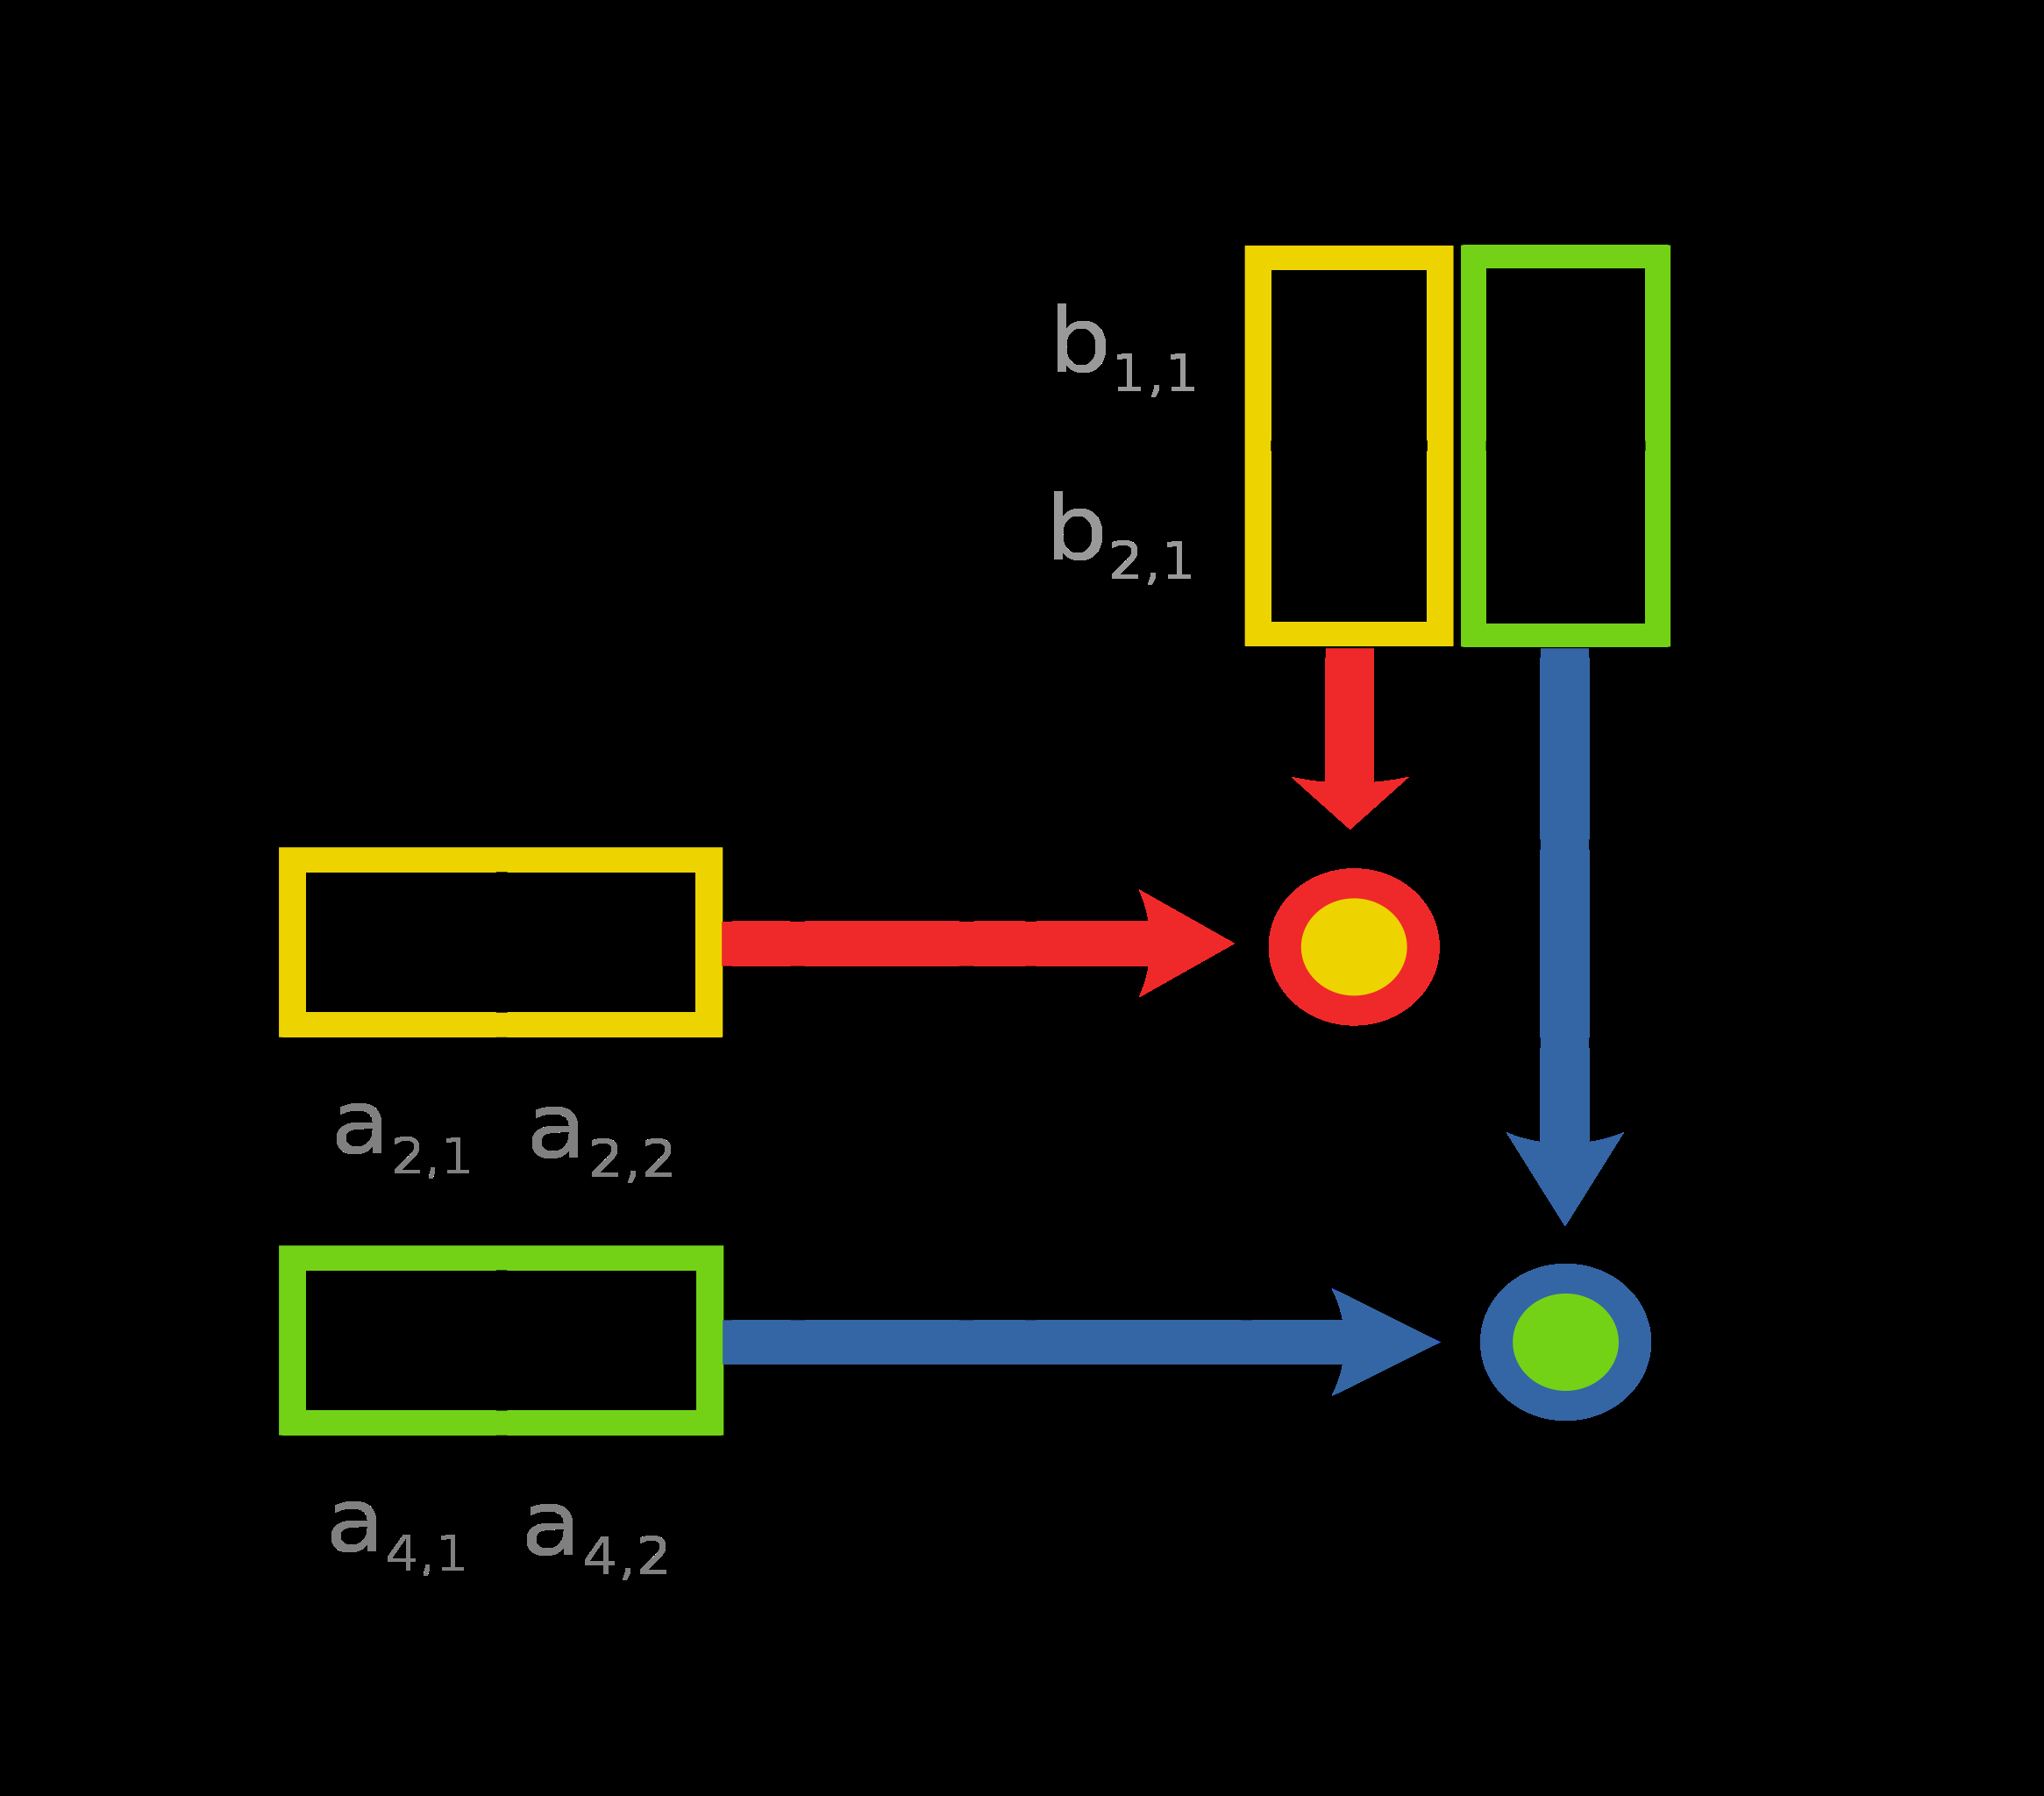

# Question 4. Implement a CUDA kernel to multiply two 1000X1000 matrices.
• Provide an appropriate CUDA kernel for the matrix multiplication.
• Provide a study on the performance when using different
block and grid sizes.

In [ ]:
%%writefile matrix_multiply.cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>

#define N 1000  // Matrix size (1000x1000)

// CUDA Kernel for Matrix Multiplication
__global__ void matrixMultiplyKernel(float* A, float* B, float* C, int n) {
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    int col = blockIdx.x * blockDim.x + threadIdx.x;

    if (row < n && col < n) {
        float sum = 0.0f;  // Local variable for the sum
        for (int k = 0; k < n; ++k) {
            sum += A[row * n + k] * B[k * n + col];
        }
        C[row * n + col] = sum;  // Store the result
    }
}

int main() {
    int size = N * N * sizeof(float);

    // Allocate memory for matrices A, B, and C on the host
    float *h_A = (float*)malloc(size);
    float *h_B = (float*)malloc(size);
    float *h_C = (float*)malloc(size);

    // Initialize matrices A and B
    for (int i = 0; i < N * N; i++) {
        h_A[i] = 1.0f;  // Example values
        h_B[i] = 2.0f;
    }

    // Allocate device memory
    float *d_A, *d_B, *d_C;
    cudaMalloc((void**)&d_A, size);
    cudaMalloc((void**)&d_B, size);
    cudaMalloc((void**)&d_C, size);

    // Copy data to device
    cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, h_B, size, cudaMemcpyHostToDevice);

    // Define block and grid dimensions
    dim3 blockDim(16, 16);
    dim3 gridDim((N + blockDim.x - 1) / blockDim.x, (N + blockDim.y - 1) / blockDim.y);

    // Launch kernel
    matrixMultiplyKernel<<<gridDim, blockDim>>>(d_A, d_B, d_C, N);

    // Copy result back to host
    cudaMemcpy(h_C, d_C, size, cudaMemcpyDeviceToHost);

    // Print a few results
    printf("C[0][0] = %f\n", h_C[0]);
    printf("C[N-1][N-1] = %f\n", h_C[N * N - 1]);

    // Free memory
    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);
    free(h_A);
    free(h_B);
    free(h_C);

    printf("Matrix multiplication completed.\n");
    return 0;
}


Writing matrix_multiply.cu


In [ ]:
!nvcc -o matrix_multiply matrix_multiply.cu
!./matrix_multiply

C[0][0] = 2000.000000
C[N-1][N-1] = 2000.000000
Matrix multiplication completed.
